BEGINNER TASK-3 : Music Recommendation using WSDM - KKBox's Music Recommendation Challenge Dataset

In [ ]:

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble, metrics
import xgboost as xgb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()


,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0


In [ ]:
df.shape

(2377804, 6)

In [ ]:
df = df.sample(frac=0.1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237780 entries, 1846402 to 2149210
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   msno                237780 non-null  object 
 1   song_id             237780 non-null  object 
 2   source_system_tab   236971 non-null  object 
 3   source_screen_name  226628 non-null  object 
 4   source_type         237102 non-null  object 
 5   target              237780 non-null  float64
dtypes: float64(1), object(5)
memory usage: 12.7+ MB


In [ ]:
songs = pd.read_csv('songs.csv')

In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [ ]:
df = pd.merge(df, songs, on='song_id', how='left')
del songs

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237780 entries, 0 to 237779
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   msno                237780 non-null  object 
 1   song_id             237780 non-null  object 
 2   source_system_tab   236971 non-null  object 
 3   source_screen_name  226628 non-null  object 
 4   source_type         237102 non-null  object 
 5   target              237780 non-null  float64
 6   song_length         237773 non-null  float64
 7   genre_ids           234197 non-null  object 
 8   artist_name         237773 non-null  object 
 9   composer            185696 non-null  object 
 10  lyricist            137830 non-null  object 
 11  language            237772 non-null  float64
dtypes: float64(3), object(9)
memory usage: 23.6+ MB


In [ ]:
members = pd.read_csv('members.csv')

In [ ]:

df = pd.merge(df, members, on='msno', how='left')
del members

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237780 entries, 0 to 237779
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    237780 non-null  object 
 1   song_id                 237780 non-null  object 
 2   source_system_tab       236971 non-null  object 
 3   source_screen_name      226628 non-null  object 
 4   source_type             237102 non-null  object 
 5   target                  237780 non-null  float64
 6   song_length             237773 non-null  float64
 7   genre_ids               234197 non-null  object 
 8   artist_name             237773 non-null  object 
 9   composer                185696 non-null  object 
 10  lyricist                137830 non-null  object 
 11  language                237772 non-null  float64
 12  city                    237780 non-null  int64  
 13  bd                      237780 non-null  int64  
 14  gender              

In [ ]:
for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237780 entries, 0 to 237779
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    237780 non-null  object 
 1   song_id                 237780 non-null  object 
 2   source_system_tab       237780 non-null  object 
 3   source_screen_name      237780 non-null  object 
 4   source_type             237780 non-null  object 
 5   target                  237780 non-null  float64
 6   song_length             237780 non-null  float64
 7   genre_ids               237780 non-null  object 
 8   artist_name             237780 non-null  object 
 9   composer                237780 non-null  object 
 10  lyricist                237780 non-null  object 
 11  language                237780 non-null  float64
 12  city                    237780 non-null  int64  
 13  bd                      237780 non-null  int64  
 14  gender              

In [ ]:
# registration_init_time
df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day

# expiration_date
df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [ ]:

#Dates to categoty
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [ ]:

# Object data to category
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

In [ ]:
df.corr()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
msno,1.000000,-0.002086,0.011841,-0.004950,-0.004917,0.001867,0.003627,0.004410,-0.000179,0.000320,-0.001541,-0.005924,0.019250,-0.002116,-0.013551,-0.005879,0.002338,0.019423,0.001257,0.008385,0.015955,0.007979,0.007621,-0.000456
song_id,-0.002086,1.000000,0.000319,0.002002,0.006849,-0.004206,-0.020947,0.016609,-0.025775,-0.045523,-0.050415,0.018038,-0.001758,-0.004793,0.004885,-0.000807,0.004045,-0.000385,0.004305,-0.001936,-0.001323,-0.000486,-0.000074,-0.002198
source_system_tab,0.011841,0.000319,1.000000,-0.034336,-0.068162,0.072194,0.027681,0.030823,0.023815,0.047368,0.035911,-0.046757,0.024571,0.015365,-0.014536,0.028805,-0.031478,0.058529,-0.025409,-0.026528,0.008373,0.050938,-0.000663,0.006264
source_screen_name,-0.004950,0.002002,-0.034336,1.000000,0.382688,-0.075710,0.019371,-0.012864,0.010082,0.014854,0.007293,-0.019299,-0.018914,-0.018357,0.021803,-0.028963,0.036381,-0.035645,0.034882,0.006109,-0.006223,-0.030227,0.002408,0.005413
source_type,-0.004917,0.006849,-0.068162,0.382688,1.000000,-0.140437,0.015746,-0.048589,-0.017972,-0.006844,-0.012862,0.021739,-0.010007,0.001256,0.013829,-0.010947,0.010186,-0.035073,0.007842,0.011980,0.004226,-0.035180,0.014237,-0.006532
target,0.001867,-0.004206,0.072194,-0.075710,-0.140437,1.000000,0.005145,0.009709,0.014238,0.000039,0.005487,-0.031616,0.014926,-0.003225,-0.012152,0.009250,0.000176,0.078265,0.001673,-0.012640,0.006430,0.065422,-0.007500,0.013318
song_length,0.003627,-0.020947,0.027681,0.019371,0.015746,0.005145,1.000000,0.045908,0.139347,0.107925,0.095719,-0.233609,0.011547,0.006414,-0.001595,0.003201,-0.011346,0.009808,-0.011437,-0.000175,-0.000757,0.008768,-0.001801,0.003879
genre_ids,0.004410,0.016609,0.030823,-0.012864,-0.048589,0.009709,0.045908,1.000000,0.206370,0.182555,0.152127,-0.322933,-0.004289,0.002065,-0.003758,0.006630,-0.003216,0.011142,-0.003956,0.005168,0.002330,0.010564,-0.002905,0.002128
artist_name,-0.000179,-0.025775,0.023815,0.010082,-0.017972,0.014238,0.139347,0.206370,1.000000,0.346642,0.311518,-0.595792,0.016651,0.010930,-0.001962,0.002173,-0.008252,0.009440,-0.008442,0.004768,-0.005527,0.005781,0.001680,0.001023
composer,0.000320,-0.045523,0.047368,0.014854,-0.006844,0.000039,0.107925,0.182555,0.346642,1.000000,0.641328,-0.389794,0.005069,0.003950,-0.000120,-0.000666,-0.006707,0.006231,-0.007080,0.002532,-0.004249,0.003874,0.001586,-0.002249


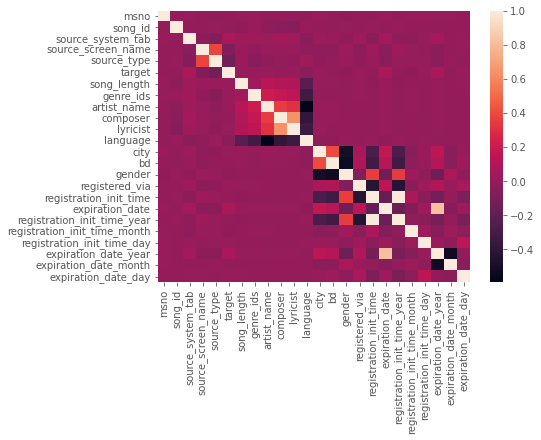

In [ ]:
plt.figure(figsize=[7,5])
sns.heatmap(df.corr())
plt.show()

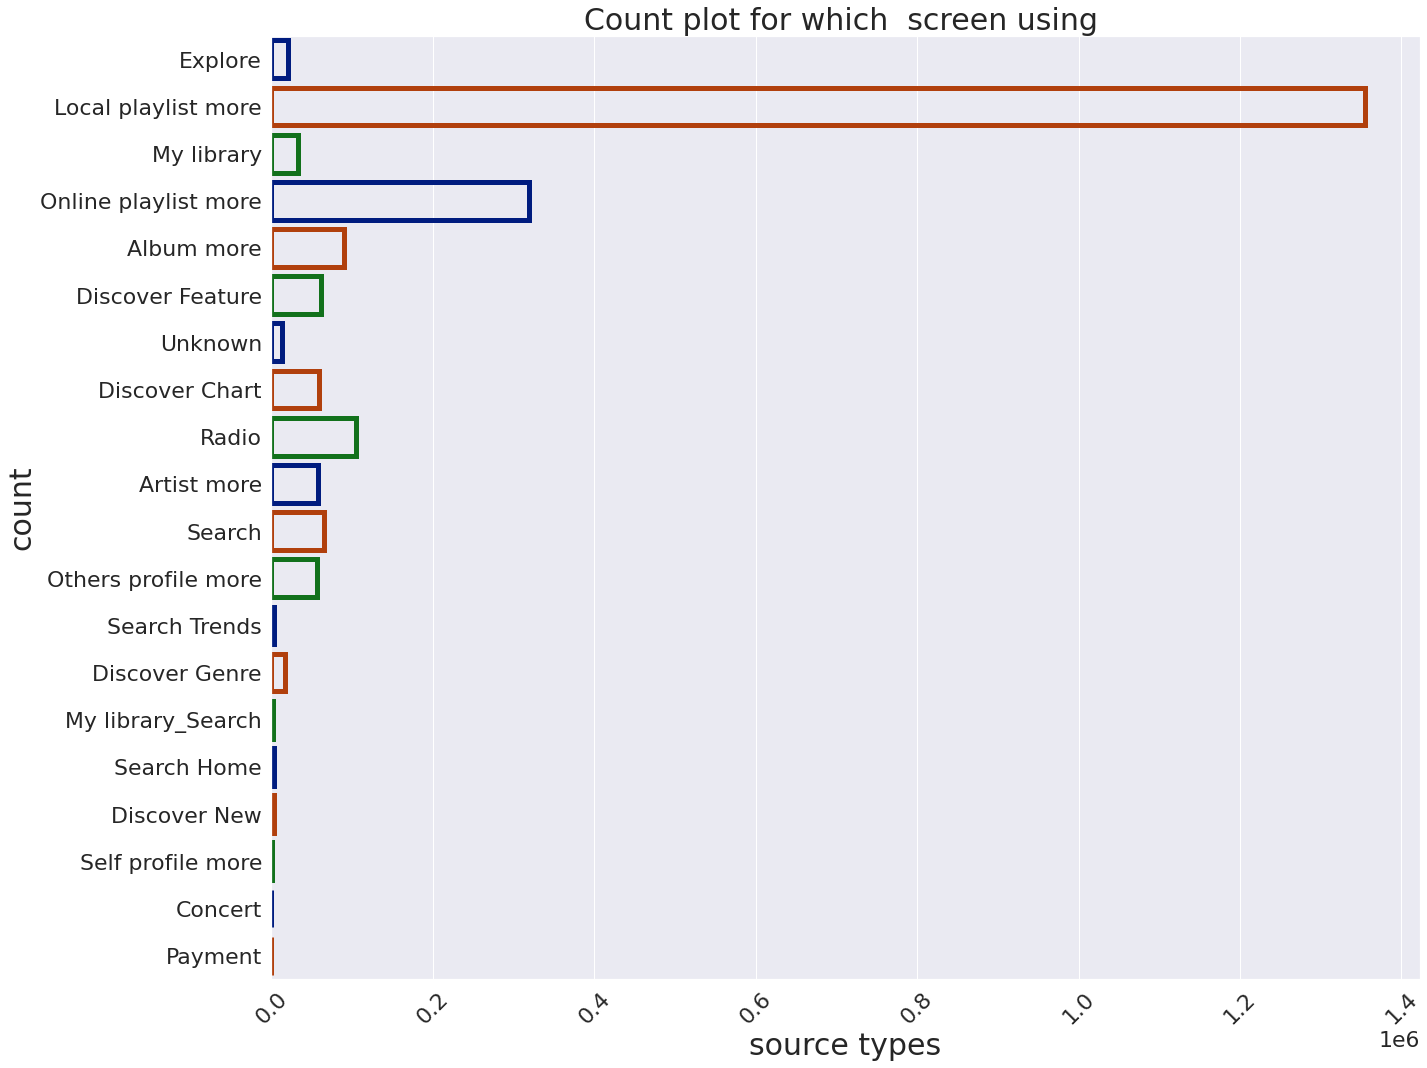

In [ ]:
tra = pd.read_csv('train.csv')
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.countplot(y='source_screen_name',data=tra,facecolor=(0,0,0,0),linewidth=5,edgecolor=sns.color_palette('dark',3))
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='45')
plt.title('Count plot for which  screen using ',fontsize=30)
plt.tight_layout()

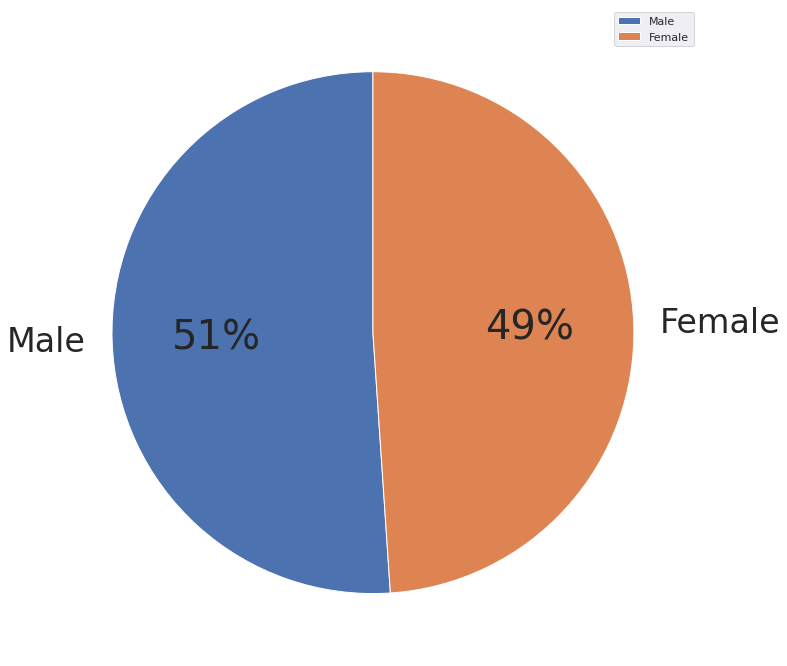

In [ ]:
import matplotlib as mpl
members = pd.read_csv('members.csv')

mpl.rcParams['font.size'] = 40.0
labels = ['Male','Female']
plt.figure(figsize = (12, 12))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels, autopct='%.0f%%',
                                    shadow=False, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()

In [ ]:

# Model with the best estimator
model = ensemble.RandomForestClassifier(n_estimators=250, max_depth=25)
model.fit(df[df.columns[df.columns != 'target']], df.target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
df_plot = pd.DataFrame({'features': df.columns[df.columns != 'target'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)


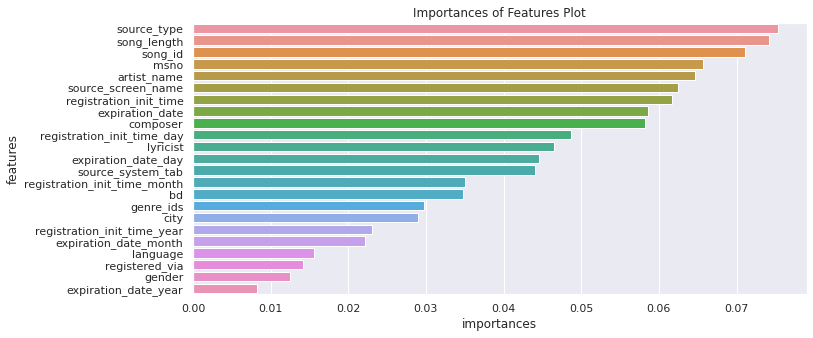

In [ ]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [ ]:
model.feature_importances_

array([0.06572828, 0.07107865, 0.0440734 , 0.06243558, 0.07527938,
       0.07420088, 0.02969936, 0.06468842, 0.05816556, 0.04650684,
       0.01558598, 0.02898513, 0.03481056, 0.01243615, 0.01421909,
       0.0617454 , 0.05859524, 0.0230701 , 0.03501421, 0.04868215,
       0.00827849, 0.02210599, 0.04461516])

In [ ]:
df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), 1)

In [ ]:

list(df.columns)

['msno',
 'song_id',
 'source_system_tab',
 'source_screen_name',
 'source_type',
 'target',
 'song_length',
 'artist_name',
 'composer',
 'lyricist',
 'registration_init_time',
 'expiration_date',
 'registration_init_time_day',
 'expiration_date_day']

In [ ]:
target = df.pop('target')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

train_data, test_data, train_labels, test_labels = train_test_split(df, target, test_size = 0.3)
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=250)
model.fit(train_data, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:

predict_labels = model.predict(test_data)
print(metrics.classification_report(test_labels, predict_labels))

              precision    recall  f1-score   support

         0.0       0.67      0.51      0.58     26450
         1.0       0.75      0.85      0.80     44884

    accuracy                           0.73     71334
   macro avg       0.71      0.68      0.69     71334
weighted avg       0.72      0.73      0.72     71334

